In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import CustomGRU as GRU

Refer to the original text here : https://arxiv.org/abs/1701.05923 . 


Here we are using three variants of original GRU[2] (gru0) as - gru1, gru2, gru3, defined in [1].

In [3]:
state_size = 500

gru0, gru1, gru2, gru3 = GRU.CustomGRU(state_size), GRU.GRU1(state_size), GRU.GRU2(state_size), GRU.GRU3(state_size)

x = tf.keras.layers.Input((None, state_size))
layer0, layer1, layer2, layer3 = tf.keras.layers.RNN(gru0), tf.keras.layers.RNN(gru1), tf.keras.layers.RNN(gru2), tf.keras.layers.RNN(gru3)
y0, y1, y2, y3 = layer0(x), layer1(x), layer2(x), layer3(x)

model0, model1, model2, model3 = tf.keras.Model(inputs=x, outputs=y0), tf.keras.Model(inputs=x, outputs=y1), tf.keras.Model(inputs=x, outputs=y2), tf.keras.Model(inputs=x, outputs=y3)


In [4]:
native_tensorflow_gru = tf.keras.layers.GRU(state_size)
y4 = native_tensorflow_gru(x)

model4 = tf.keras.Model(inputs=x, outputs=y4)

In [5]:
model0.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005, beta_1=0.9))
model1.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005, beta_1=0.9))
model2.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005, beta_1=0.9))
model3.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005, beta_1=0.9))
model4.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005, beta_1=0.9))

In [6]:
X, Y = np.random.rand(1000, 20, state_size), np.random.rand(1000,state_size)

In [7]:
model0_results = model0.fit(X, Y, batch_size = 50, epochs = 50)
model1_results = model1.fit(X, Y, batch_size = 50, epochs = 50)
model2_results = model2.fit(X, Y, batch_size = 50, epochs = 50)
model3_results = model3.fit(X, Y, batch_size = 50, epochs = 50)
model4_results = model4.fit(X, Y, batch_size = 50, epochs = 50)

Epoch 1/50
20/20 [==============================] - 8s 300ms/step - loss: 0.1825
Epoch 2/50
20/20 [==============================] - 6s 311ms/step - loss: 0.1128
Epoch 3/50
20/20 [==============================] - 6s 313ms/step - loss: 0.1019
Epoch 4/50
20/20 [==============================] - 6s 314ms/step - loss: 0.0975
Epoch 5/50
20/20 [==============================] - 6s 318ms/step - loss: 0.0962
Epoch 6/50
20/20 [==============================] - 6s 321ms/step - loss: 0.0946
Epoch 7/50
20/20 [==============================] - 6s 321ms/step - loss: 0.0929
Epoch 8/50
20/20 [==============================] - 7s 339ms/step - loss: 0.0916
Epoch 9/50
20/20 [==============================] - 6s 320ms/step - loss: 0.0908
Epoch 10/50
20/20 [==============================] - 6s 322ms/step - loss: 0.0899
Epoch 11/50
20/20 [==============================] - 6s 320ms/step - loss: 0.0890
Epoch 12/50
20/20 [==============================] - 6s 321ms/step - loss: 0.0882
Epoch 13/50
20/20 [======

Epoch 46/50
20/20 [==============================] - 7s 359ms/step - loss: 0.0699
Epoch 47/50
20/20 [==============================] - 7s 360ms/step - loss: 0.0693
Epoch 48/50
20/20 [==============================] - 7s 359ms/step - loss: 0.0687
Epoch 49/50
20/20 [==============================] - 7s 360ms/step - loss: 0.0683
Epoch 50/50
20/20 [==============================] - 7s 364ms/step - loss: 0.0677
Epoch 1/50
20/20 [==============================] - 7s 307ms/step - loss: 0.1851
Epoch 2/50
20/20 [==============================] - 6s 304ms/step - loss: 0.1152
Epoch 3/50
20/20 [==============================] - 6s 304ms/step - loss: 0.1013
Epoch 4/50
20/20 [==============================] - 6s 304ms/step - loss: 0.0970
Epoch 5/50
20/20 [==============================] - 6s 301ms/step - loss: 0.0947
Epoch 6/50
20/20 [==============================] - 6s 302ms/step - loss: 0.0933
Epoch 7/50
20/20 [==============================] - 6s 302ms/step - loss: 0.0927
Epoch 8/50
20/20 [=====

20/20 [==============================] - 6s 290ms/step - loss: 0.0775
Epoch 34/50
20/20 [==============================] - 6s 302ms/step - loss: 0.0767
Epoch 35/50
20/20 [==============================] - 7s 334ms/step - loss: 0.0764
Epoch 36/50
20/20 [==============================] - 6s 306ms/step - loss: 0.0760
Epoch 37/50
20/20 [==============================] - 6s 290ms/step - loss: 0.0755
Epoch 38/50
20/20 [==============================] - 6s 288ms/step - loss: 0.0748
Epoch 39/50
20/20 [==============================] - 6s 292ms/step - loss: 0.0745
Epoch 40/50
20/20 [==============================] - 6s 290ms/step - loss: 0.0742
Epoch 41/50
20/20 [==============================] - 6s 287ms/step - loss: 0.0736
Epoch 42/50
20/20 [==============================] - 6s 291ms/step - loss: 0.0729
Epoch 43/50
20/20 [==============================] - 6s 290ms/step - loss: 0.0724
Epoch 44/50
20/20 [==============================] - 6s 288ms/step - loss: 0.0721
Epoch 45/50
20/20 [=========

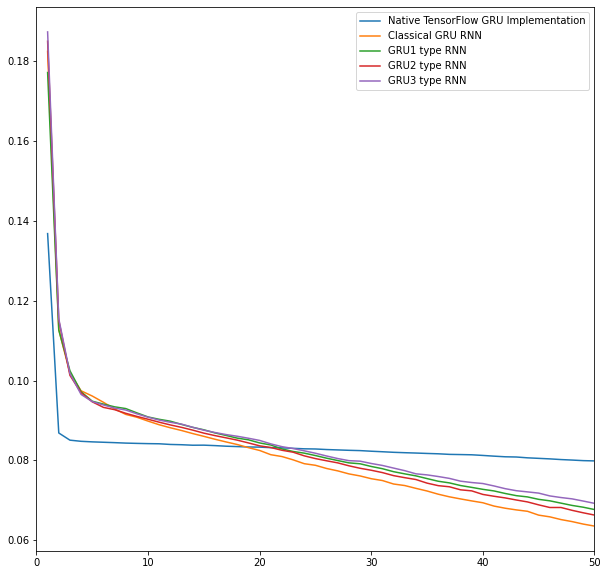

In [8]:
plt.figure(figsize=(10, 10))
y4 = model4_results.history['loss']
x4 = range(1, len(y4) + 1)
plt.plot(x4, y4, label='Native TensorFlow GRU Implementation')
plt.xlim(0, 50)
#plt.ylim(1, 0)
y0 = model0_results.history['loss']
x0 = range(1, len(y0) + 1)
plt.plot(x0, y0, label='Classical GRU RNN')
plt.xlim(0, 50)
#plt.ylim(1, 0)
y1 = model1_results.history['loss']
x1 = range(1, len(y1) + 1)
plt.plot(x1, y1, label='GRU1 type RNN')
plt.xlim(0, 50)
#plt.ylim(1, 0)
y2 = model2_results.history['loss']
x2 = range(1, len(y2) + 1)
plt.plot(x2, y2, label='GRU2 type RNN')
plt.xlim(0, 50)
#plt.ylim(1, 0)
y3 = model3_results.history['loss']
x3 = range(1, len(y3) + 1)
plt.plot(x3, y3, label='GRU3 type RNN')
plt.xlim(0, 50)
#plt.ylim(1, 0)
plt.legend()
plt.show()

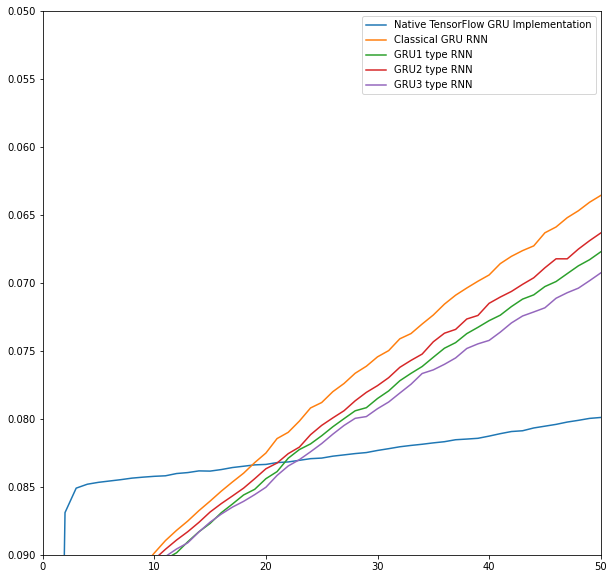

In [9]:
plt.figure(figsize=(10, 10))
y4 = model4_results.history['loss']
x4 = range(1, len(y4) + 1)
plt.plot(x4, y4, label='Native TensorFlow GRU Implementation')
plt.xlim(0, 50)
plt.ylim(0.09, 0.05)
y0 = model0_results.history['loss']
x0 = range(1, len(y0) + 1)
plt.plot(x0, y0, label='Classical GRU RNN')
plt.xlim(0, 50)
plt.ylim(0.09, 0.05)
y1 = model1_results.history['loss']
x1 = range(1, len(y1) + 1)
plt.plot(x1, y1, label='GRU1 type RNN')
plt.xlim(0, 50)
plt.ylim(0.09, 0.05)
y2 = model2_results.history['loss']
x2 = range(1, len(y2) + 1)
plt.plot(x2, y2, label='GRU2 type RNN')
plt.xlim(0, 50)
plt.ylim(0.09, 0.05)
y3 = model3_results.history['loss']
x3 = range(1, len(y3) + 1)
plt.plot(x3, y3, label='GRU3 type RNN')
plt.xlim(0, 50)
plt.ylim(0.09, 0.05)
plt.legend()
plt.show()

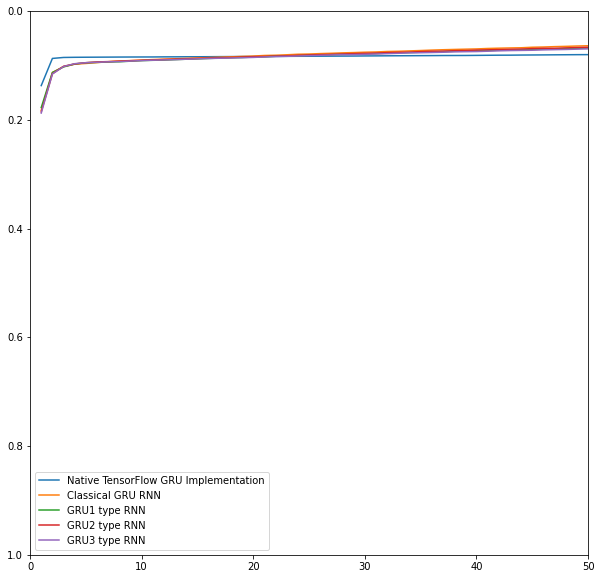

In [10]:
plt.figure(figsize=(10, 10))
y4 = model4_results.history['loss']
x4 = range(1, len(y4) + 1)
plt.plot(x4, y4, label='Native TensorFlow GRU Implementation')
plt.xlim(0, 50)
#plt.ylim(1, 0)
y0 = model0_results.history['loss']
x0 = range(1, len(y0) + 1)
plt.plot(x0, y0, label='Classical GRU RNN')
plt.xlim(0, 50)
plt.ylim(1, 0)
y1 = model1_results.history['loss']
x1 = range(1, len(y1) + 1)
plt.plot(x1, y1, label='GRU1 type RNN')
plt.xlim(0, 50)
plt.ylim(1, 0)
y2 = model2_results.history['loss']
x2 = range(1, len(y2) + 1)
plt.plot(x2, y2, label='GRU2 type RNN')
plt.xlim(0, 50)
plt.ylim(1, 0)
y3 = model3_results.history['loss']
x3 = range(1, len(y3) + 1)
plt.plot(x3, y3, label='GRU3 type RNN')
plt.xlim(0, 50)
plt.ylim(1, 0)
plt.legend()
plt.show()

<h1>REFERENCES</h1>
<br>
1. Dey, Rahul, and Fathi M. Salem. "Gate-variants of gated recurrent unit (GRU) neural networks." 2017 IEEE 60th international midwest symposium on circuits and systems (MWSCAS). IEEE, 2017.
2. 2. Chung, Junyoung, et al. "Empirical evaluation of gated recurrent neural networks on sequence modeling." arXiv preprint arXiv:1412.3555 (2014).